In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks
import os

In [3]:
archivo = fits.open('TCampob278.fits')
archivo1 = fits.open('PVariablesb278.fits')
HJD=archivo[1].data
Error=archivo1[4].data
Ks=archivo1[3].data
archivo1.info()

Filename: PVariablesb278.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  KS_ALE        1 ImageHDU         7   (1260548,)   float64   
  2  EKS_ALE       1 ImageHDU         8   (66, 100000)   float64   
  3  KS_PV         1 ImageHDU         8   (66, 103)   float64   
  4  EKS_PV        1 ImageHDU         8   (66, 103)   float64   


In [4]:
def eliminar_nan(error, ks, HJD):
    indices_validos = ~np.isnan(ks)
    error_filtrado = [error[i] for i in range(len(ks)) if indices_validos[i]]
    ks_filtrado = [ks[i] for i in range(len(ks)) if indices_validos[i]]
    HJD_filtrado = [HJD[i] for i in range(len(ks)) if indices_validos[i]]
    return error_filtrado, ks_filtrado, np.round(HJD_filtrado,8)

ks_nan=[]
error_nan=[]
HJD_na=[]
y=0
while y<len(Ks):
    error_filtrado, ks_filtrado, HJD_filtrado = eliminar_nan(Error[y], Ks[y], HJD-2400000)
    ks_nan.append(ks_filtrado)
    error_nan.append(error_filtrado)
    HJD_na.append(HJD_filtrado)
    y+=1
print(error_nan[-1])
print(ks_nan[-1])
print(HJD_na[-1])
print(len(HJD_na))

[0.061, 0.052, 0.048, 0.046, 0.054, 0.057, 0.052, 0.082, 0.06, 0.054, 0.05, 0.087, 0.096, 0.078, 0.055, 0.052, 0.051, 0.056, 0.054, 0.05, 0.053, 0.073, 0.054, 0.085, 0.051, 0.056, 0.06, 0.07, 0.063, 0.061, 0.059, 0.061, 0.069, 0.067, 0.06, 0.057, 0.054, 0.057, 0.065, 0.094, 0.057, 0.12, 0.063, 0.081, 0.066, 0.069, 0.076, 0.06, 0.11, 0.071, 0.091, 0.067, 0.061, 0.076, 0.084, 0.098, 0.069, 0.105, 0.074]
[15.198, 15.031, 14.989, 14.962, 15.094, 15.074, 15.023, 15.581, 15.176, 15.083, 15.007, 15.651, 15.665, 15.462, 15.061, 14.978, 15.011, 15.126, 15.044, 14.993, 15.122, 15.405, 15.026, 15.579, 14.981, 15.089, 15.138, 15.314, 15.244, 15.224, 15.134, 15.206, 15.323, 15.295, 15.13, 15.061, 15.036, 15.127, 15.183, 15.661, 15.096, 15.709, 15.177, 15.373, 15.219, 15.189, 15.319, 15.102, 15.704, 15.173, 15.405, 15.116, 15.073, 15.262, 15.118, 15.493, 15.167, 15.72, 15.2]
[55820.56199467 55839.52441602 56507.49557602 56484.67874153
 56509.54330404 55806.59149225 56020.78712759 56115.59726817
 571

In [5]:
x=0
while x<len(ks_nan):
    serie = ks_nan[x]
    erro = error_nan[x]
    hjd = HJD_na[x]

    # Definir el nombre del archivo de texto
    nombre_archivo = "Datosb278"+str(x)+".txt"

    with open(nombre_archivo, "w") as archivo:
        for h, s, e in zip(hjd, serie, erro):
            archivo.write("{:<15} {:<10} {:<6}\n".format(h, s, e))
    x+=1
print("hecho")

hecho


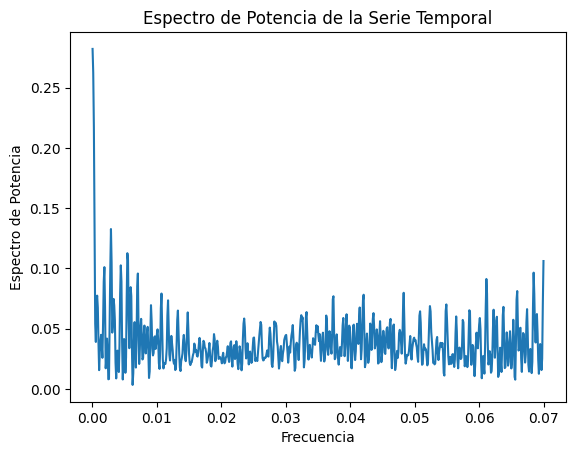

In [6]:
S=ks_nan[0]
Date=HJD_na[0]
# Calcular el espectro de potencia utilizando Lomb-Scargle
frequency, power = LombScargle(Date, S).autopower()

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal')
# Guarda la gráfica en un archivo
#plt.savefig('serie_potencias2_b279.png')

plt.show()

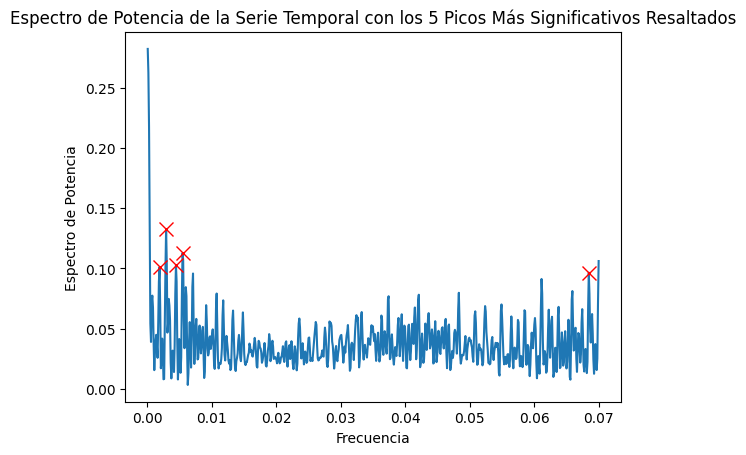

In [7]:
# Encontrar picos en el espectro de potencia
peaks, _ = find_peaks(power)
# Obtener los 5 picos más significativos
sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:5]

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.plot(frequency[sorted_peaks], power[sorted_peaks], "x", markersize=10, color='r')  # Marcar los picos
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal con los 5 Picos Más Significativos Resaltados')
# Guarda la gráfica en un archivo
#plt.savefig('serie_potencias2_b279_5_picos.png')

plt.show()

In [8]:
frecuencia, potencia= frequency[sorted_peaks], list(power[sorted_peaks])
max_p=max(potencia)
r = potencia.index(max_p)
f=frecuencia[r]
P=1/f
print(P)


344.69894336666727


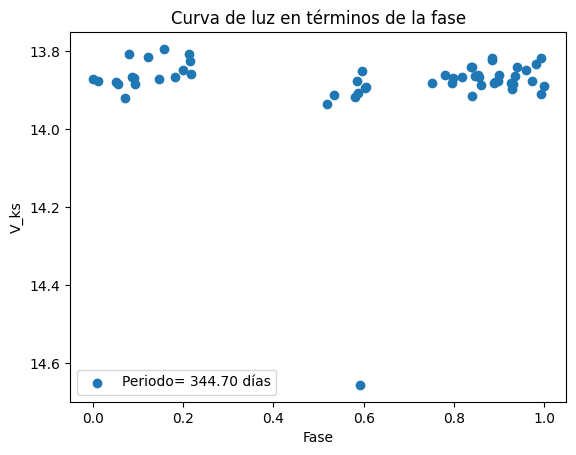

In [9]:
P=344.69894336666727
t_0 = Date[0]

# 3. Calcular la fase para cada punto de tus datos
fase = ((Date - t_0) / P) - np.floor((Date - t_0) / P)
plt.scatter(fase, S)
plt.xlabel('Fase')
plt.ylabel('V_ks')
# Invertir el eje y
plt.gca().invert_yaxis()
plt.title('Curva de luz en términos de la fase')
# Muestra la leyenda con el período promedio
plt.legend(['Periodo= {:.2f} días'.format(P)])
# Guarda la gráfica en un archivo
#plt.savefig('Curva3_b279.png')
plt.show()

In [10]:
y=0
freq=[]
powe=[]
peri=[]
nombre=[]
while y<len(ks_nan):
    S=ks_nan[y]
    Date=HJD_na[y]
    # Calcular el espectro de potencia utilizando Lomb-Scargle
    frequency, power = LombScargle(Date, S).autopower()
    # Encontrar picos en el espectro de potencia
    peaks, _ = find_peaks(power)
    # Obtener los 5 picos más significativos
    sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:5]
    frecuencia, potencia= frequency[sorted_peaks], list(power[sorted_peaks])
    max_p=max(potencia)
    r = potencia.index(max_p)
    f=frecuencia[r]
    P=1/f
    nombre.append("Datosb279"+str(y)+".txt")
    freq.append(f)
    powe.append(max_p)
    peri.append(P)
    y+=1

In [11]:
# Ordenar las listas basadas en la lista powe
sorted_data = sorted(zip(powe, freq, peri, nombre), reverse=True)

# Desempaquetar las listas ordenadas
powe, freq, peri, nombre = zip(*sorted_data)

print("powe:", powe)
print("nombre:", nombre)

powe: (0.45346724534963695, 0.43462991323100253, 0.3942181010871845, 0.361612150660116, 0.351243726483847, 0.3364817204251836, 0.3262168144913238, 0.32111866086164625, 0.31263527320245893, 0.27720107027750795, 0.27497206473384206, 0.27073393119235084, 0.2615785910554197, 0.2582278106465937, 0.2580342466810435, 0.255939990082894, 0.25453281422952573, 0.24495684977734508, 0.2387175021688752, 0.23705721896324156, 0.2367882439452019, 0.23485545445112585, 0.22281344210176285, 0.2218753584714198, 0.21298788058523224, 0.21002232965316053, 0.2099486666515771, 0.209599386707661, 0.20808234344654725, 0.2056110983295876, 0.20463915320097806, 0.20416836150223985, 0.20378028781479732, 0.19631077091823942, 0.19498597343724333, 0.1946382183770293, 0.19137714598957845, 0.18863645889448521, 0.1882131403633182, 0.18734756958460394, 0.18501891903385964, 0.18222160917289468, 0.18130267934941094, 0.17823956773905292, 0.17669053171160437, 0.17580701271364316, 0.17538614628647495, 0.17104242829931854, 0.1710

In [12]:
# Nombre del archivo de texto
nombre_archivo = "Potanciasb278.txt"
# Guardar en archivo de texto
with open(nombre_archivo, "w") as archivo:
        for n, w, f, t in zip(nombre, powe, freq, peri):
            archivo.write("{:<20} {:<25} {:<30} {:<30}\n".format(n, w, f, t))